In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
movies_df = pd.read_csv(r"Add link to dataset")
series_df = pd.read_csv(r"Add link to dataset")

In [9]:
content_df = pd.concat([movies_df, series_df], ignore_index=True)

In [6]:
movies_only = content_df[content_df['type'] == 'Movie']
series_only = content_df[content_df['type'] == 'TV Show']
# Extracting only movies and series from combined dataset

In [7]:
print("Movies shape:", movies_df.shape)
print("TV Shows shape:", series_df.shape)

Movies shape: (16000, 18)
TV Shows shape: (16000, 16)


In [8]:
print(movies_df.head(3))
print(series_df.head(3))

   show_id   type                                         title  \
0    10192  Movie                           Shrek Forever After   
1    27205  Movie                                     Inception   
2    12444  Movie  Harry Potter and the Deathly Hallows: Part 1   

            director                                               cast  \
0      Mike Mitchell  Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...   
1  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...   
2        David Yates  Daniel Radcliffe, Emma Watson, Rupert Grint, T...   

                                    country  date_added  release_year  rating  \
0                  United States of America  2010-05-16          2010   6.380   
1  United Kingdom, United States of America  2010-07-15          2010   8.369   
2  United Kingdom, United States of America  2010-11-17          2010   7.744   

   duration                                         genres language  \
0       NaN  Comedy, Adventure, Fa

In [9]:
# Summary statistics for numeric columns
print(movies_df.describe())
print(series_df.describe())

            show_id  release_year        rating  duration    popularity  \
count  1.600000e+04  16000.000000  16000.000000       0.0  16000.000000   
mean   5.266582e+05   2017.500000      5.956368       NaN     20.384728   
std    3.794427e+05      4.609916      1.754741       NaN     68.610033   
min    1.890000e+02   2010.000000      0.000000       NaN      3.860000   
25%    2.257258e+05   2013.750000      5.600000       NaN      7.840750   
50%    4.468170e+05   2017.500000      6.300000       NaN     10.913500   
75%    7.739808e+05   2021.250000      6.923000       NaN     17.336500   
max    1.440471e+06   2025.000000     10.000000       NaN   3876.006000   

         vote_count  vote_average        budget       revenue  
count  16000.000000  16000.000000  1.600000e+04  1.600000e+04  
mean     718.656125      5.956368  8.766792e+06  2.446308e+07  
std     2080.198316      1.754741  2.912450e+07  1.116977e+08  
min        0.000000      0.000000  0.000000e+00  0.000000e+00  
25% 

In [10]:
# Data types and non-null counts
print(movies_df.info())
print(series_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [11]:
print("Duplicate Movies:", movies_df.duplicated().sum())
print("Duplicate Series:", series_df.duplicated().sum())

Duplicate Movies: 0
Duplicate Series: 0


In [12]:
print("Movies missing values:\n", movies_df.isnull().sum())
print("Series missing values:\n", series_df.isnull().sum())

Movies missing values:
 show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64
Series missing values:
 show_id             0
type                0
title               0
director        10965
cast             1157
country          1797
date_added          0
release_year        0
rating              0
duration            0
genres            974
language            0
description      3206
popularity          0
vote_count          0
vote_average        0
dtype: int64


In [13]:

movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')
series_df['date_added'] = pd.to_datetime(series_df['date_added'], errors='coerce')

In [14]:

movies_df['genres'] = movies_df['genres'].str.lower().str.strip()
series_df['genres'] = series_df['genres'].str.lower().str.strip()

In [15]:


def convert_duration(value):
    if pd.isna(value): return None
    value = str(value).lower()
    if 'h' in value or 'min' in value:
        parts = value.replace('h', 'h ').split()
        total = 0
        for part in parts:
            if 'h' in part:
                total += int(part.replace('h', '')) * 60
            elif 'min' in part:
                total += int(part.replace('min', ''))
        return total
    elif 'season' in value:
        return int(value.split()[0])
    return None

movies_df['duration_mins'] = movies_df['duration'].apply(convert_duration)
series_df['duration_seasons'] = series_df['duration'].apply(convert_duration)


In [16]:

def missing_report(df, name):
    print(f"\nMissing values in {name}:\n")
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': percent})
    print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

missing_report(movies_df, 'movies_df')
missing_report(series_df, 'series_df')


Missing values in movies_df:

               Missing Count  Percentage (%)
duration               16000       100.00000
duration_mins          16000       100.00000
country                  466         2.91250
cast                     204         1.27500
director                 132         0.82500
description              132         0.82500
genres                   107         0.66875

Missing values in series_df:

             Missing Count  Percentage (%)
director             10965        68.53125
description           3206        20.03750
country               1797        11.23125
cast                  1157         7.23125
genres                 974         6.08750


In [17]:

for df in [movies_df, series_df]:
    df['director'] = df['director'].fillna('Unknown')
    df['cast'] = df['cast'].fillna('Unknown')
    df['country'] = df['country'].fillna('Unknown')
    df['duration'] = df['duration'].fillna('Not Available')
    df['genres'] = df['genres'].fillna('Uncategorized')
    df['description'] = df['description'].fillna('Not Available')


movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')
series_df['date_added'] = pd.to_datetime(series_df['date_added'], errors='coerce')


movies_df['budget'] = movies_df['budget'].fillna(0)
movies_df['revenue'] = movies_df['revenue'].fillna(0)


movies_df.dropna(subset=['vote_average'], inplace=True)
series_df.dropna(subset=['vote_average'], inplace=True)


In [18]:

missing_report(movies_df, 'movies_df (after cleaning)')
missing_report(series_df, 'series_df (after cleaning)')


Missing values in movies_df (after cleaning):

               Missing Count  Percentage (%)
duration_mins          16000           100.0

Missing values in series_df (after cleaning):

Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []


 -----------EXPLORATORY DATA ANALYSIS--------------

In [19]:
print("Movies:", movies_df.shape)
print("Series:", series_df.shape)

Movies: (16000, 19)
Series: (16000, 17)


In [20]:
print("Movies by type:\n", movies_df['type'].value_counts())
print("Series by type:\n", series_df['type'].value_counts())

Movies by type:
 type
Movie    16000
Name: count, dtype: int64
Series by type:
 type
TV Show    16000
Name: count, dtype: int64


In [21]:
print("Unique movie genres:", movies_df['genres'].nunique())
print("Unique series genres:", series_df['genres'].nunique())
print("Movie ratings:", movies_df['rating'].unique())
print("Series ratings:", series_df['rating'].unique())

Unique movie genres: 2769
Unique series genres: 1219
Movie ratings: [6.38  8.369 7.744 ... 8.333 7.455 9.4  ]
Series ratings: [8.241 7.035 5.6   ... 8.016 9.667 6.818]


In [22]:

movies_by_year = movies_df['release_year'].value_counts().sort_index()
series_by_year = series_df['release_year'].value_counts().sort_index()

In [23]:

movies_df['added_year'] = movies_df['date_added'].dt.year
series_df['added_year'] = series_df['date_added'].dt.year

added_movies = movies_df['added_year'].value_counts().sort_index()
added_series = series_df['added_year'].value_counts().sort_index()

In [24]:

def top_genres(df, name):
    genres = df['genres'].dropna().str.lower().str.split(', ')
    flat_list = [genre for sublist in genres for genre in sublist if genre]
    top = Counter(flat_list).most_common(10)
    print(f"\nTop genres in {name}:\n")
    for g, c in top:
        print(f"{g}: {c}")

top_genres(movies_df, 'Movies')
top_genres(series_df, 'TV Shows')


Top genres in Movies:

drama: 6910
comedy: 4533
thriller: 3769
action: 3239
romance: 2571
horror: 2425
adventure: 1768
crime: 1738
animation: 1579
family: 1472

Top genres in TV Shows:

drama: 7866
comedy: 4577
animation: 2491
action & adventure: 1988
sci-fi & fantasy: 1958
reality: 1632
family: 1542
crime: 1465
mystery: 1334
uncategorized: 974


In [25]:

print("Movie avg vote:", movies_df['vote_average'].mean())
print("Series avg vote:", series_df['vote_average'].mean())

print("Top 5 most popular movies:\n", movies_df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head())
print("Top 5 most popular series:\n", series_df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head())

Movie avg vote: 5.956368125
Series avg vote: 5.4171070624999995
Top 5 most popular movies:
                        title  popularity
15000              The Gorge    3876.006
15001            Flight Risk    3320.616
14000  Mufasa: The Lion King    2643.627
14001   Sonic the Hedgehog 3    2402.503
14002                Moana 2    2347.007
Top 5 most popular series:
                                         title  popularity
5000       The Late Show with Stephen Colbert    6421.923
4000   The Tonight Show Starring Jimmy Fallon    4925.253
2000                    Good Mythical Morning    3414.466
8000                    Chronicles of the Sun    2987.485
14000                          Volta por Cima    2885.720


In [26]:

print("Top 5 movie countries:\n", movies_df['country'].value_counts().head())
print("Top 5 series countries:\n", series_df['country'].value_counts().head())


print("Top 5 movie languages:\n", movies_df['language'].value_counts().head())
print("Top 5 series languages:\n", series_df['language'].value_counts().head())

Top 5 movie countries:
 country
United States of America    5421
Japan                        845
South Korea                  789
France                       612
United Kingdom               581
Name: count, dtype: int64
Top 5 series countries:
 country
United States of America    2339
China                       1797
Unknown                     1797
Japan                       1742
South Korea                 1210
Name: count, dtype: int64
Top 5 movie languages:
 language
en    9534
fr    1054
ja     904
ko     876
es     731
Name: count, dtype: int64
Top 5 series languages:
 language
en    4437
zh    2456
ja    1883
ko    1364
es     916
Name: count, dtype: int64


In [27]:
movies_df['title_length'] = movies_df['title'].str.len()
series_df['title_length'] = series_df['title'].str.len()

print("Longest movie title:\n", movies_df.loc[movies_df['title_length'].idxmax()])
print("Longest series title:\n", series_df.loc[series_df['title_length'].idxmax()])

Longest movie title:
 show_id                                                     471925
type                                                         Movie
title            Entrei em Pânico ao Saber o Que Vocês Fizeram ...
director                                          Felipe M. Guerra
cast             Eliseu Demari, Niandra Sartori, Rodrigo Guerra...
country                                                     Brazil
date_added                                     2011-10-20 00:00:00
release_year                                                  2011
rating                                                         6.9
duration                                             Not Available
genres                                              comedy, horror
language                                                        pt
description      Seven years after the massacre of the first fi...
popularity                                                   8.828
vote_count                              

-----------Visualization — Netflix Content Analysis----------

In [28]:

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

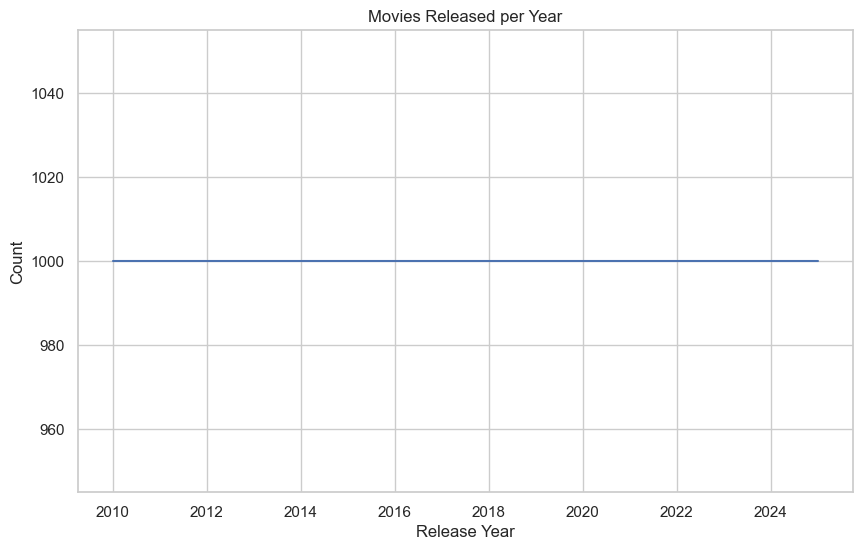

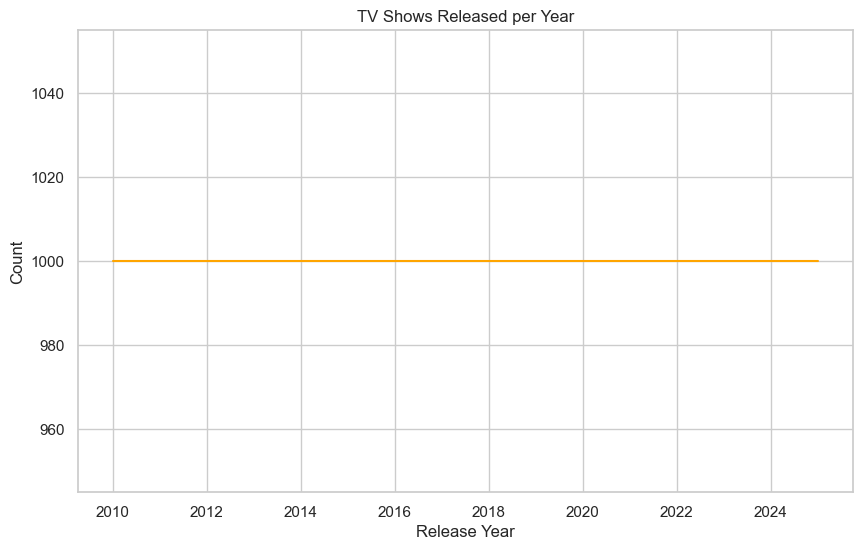

In [29]:

movies_by_year = movies_df['release_year'].value_counts().sort_index()
sns.lineplot(x=movies_by_year.index, y=movies_by_year.values)
plt.title("Movies Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


series_by_year = series_df['release_year'].value_counts().sort_index()
sns.lineplot(x=series_by_year.index, y=series_by_year.values, color="orange")
plt.title("TV Shows Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1570015215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=added_movies.index, y=added_movies.values, palette='Blues_d')


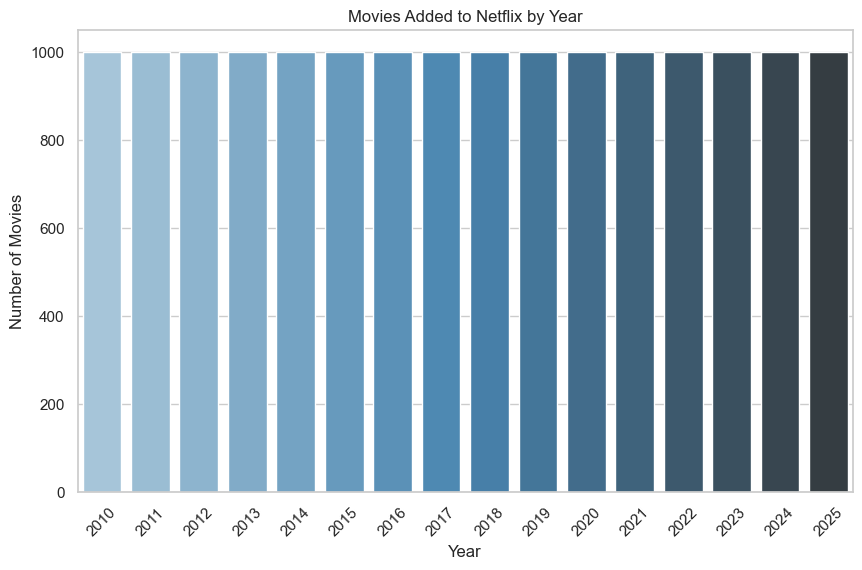

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1570015215.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=added_series.index, y=added_series.values, palette='Oranges_d')


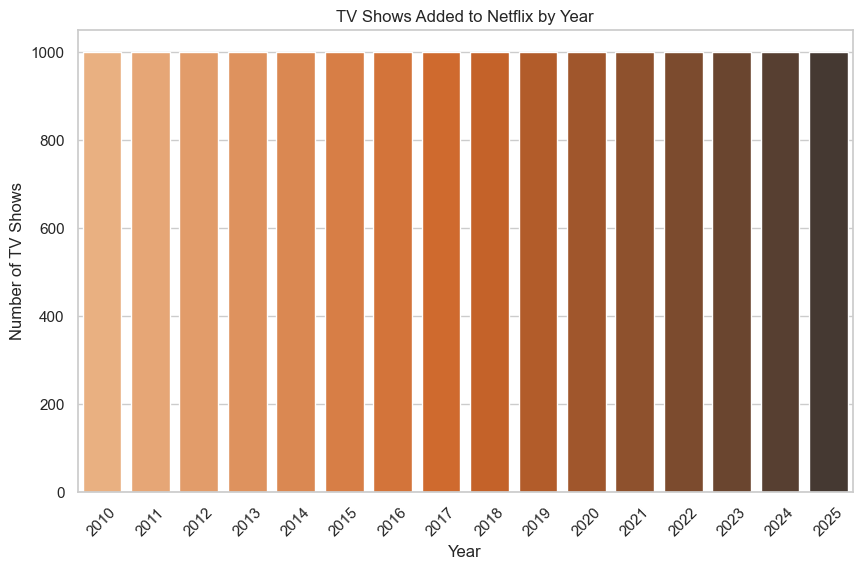

In [30]:

added_movies = movies_df['added_year'].value_counts().sort_index()
sns.barplot(x=added_movies.index, y=added_movies.values, palette='Blues_d')
plt.title("Movies Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


added_series = series_df['added_year'].value_counts().sort_index()
sns.barplot(x=added_series.index, y=added_series.values, palette='Oranges_d')
plt.title("TV Shows Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of TV Shows")
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2493680817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette=color)


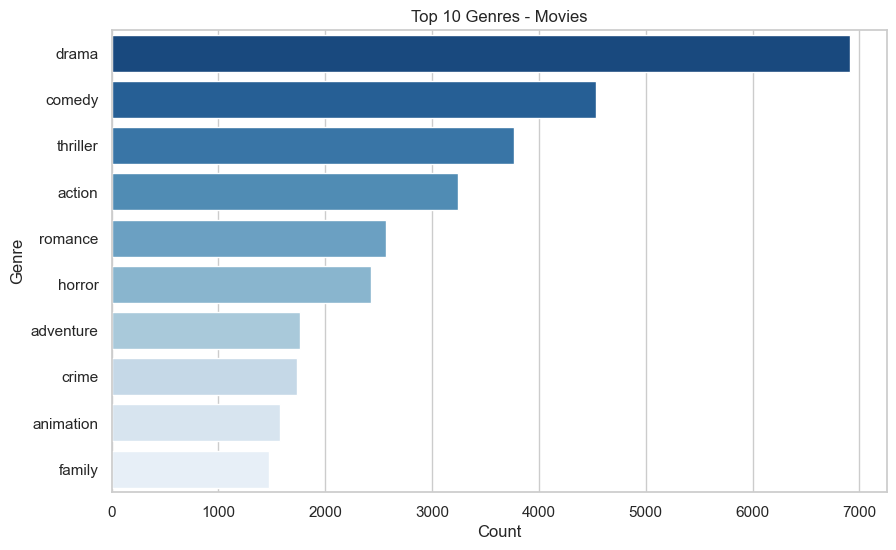

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2493680817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette=color)


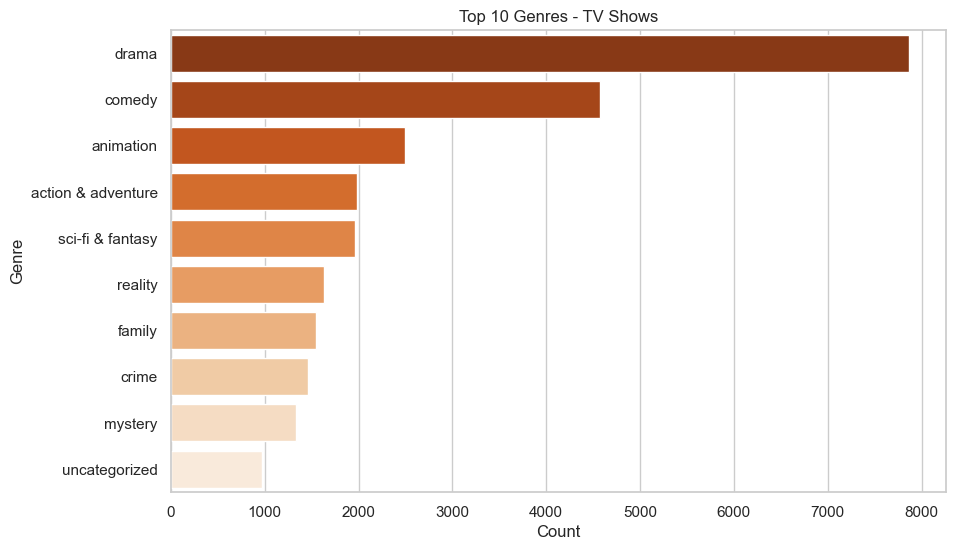

In [31]:

def plot_top_genres(df, label, color):
    genres_series = df['genres'].dropna().str.lower().str.split(', ')
    all_genres = [genre for sublist in genres_series for genre in sublist]
    genre_counts = Counter(all_genres)
    top_genres = dict(genre_counts.most_common(10))
    
    sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette=color)
    plt.title(f"Top 10 Genres - {label}")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()

plot_top_genres(movies_df, "Movies", "Blues_r")
plot_top_genres(series_df, "TV Shows", "Oranges_r")


C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3674919713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_movies.values, y=top_countries_movies.index, palette='Blues')


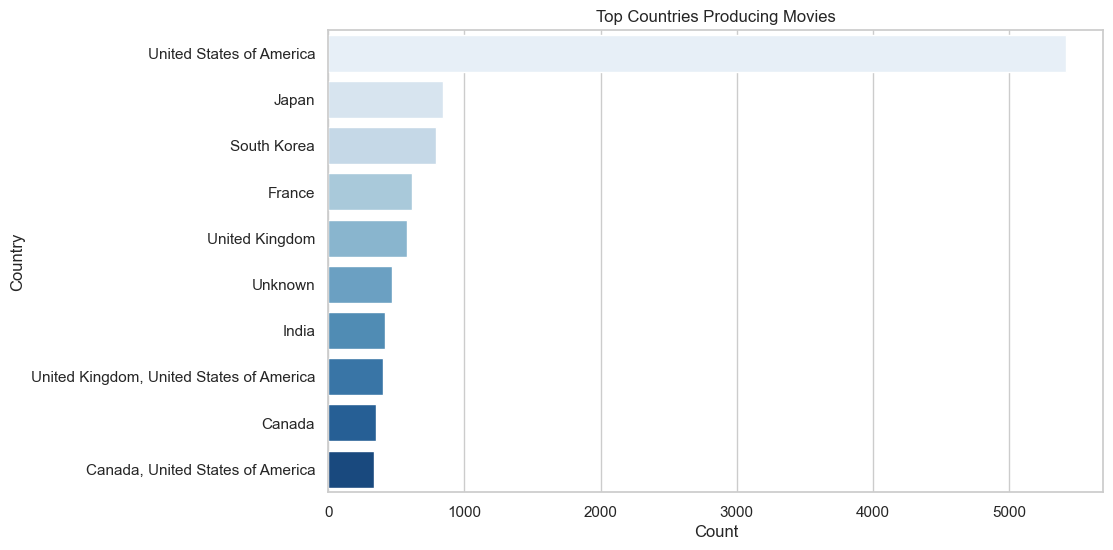

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3674919713.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_series.values, y=top_countries_series.index, palette='Oranges')


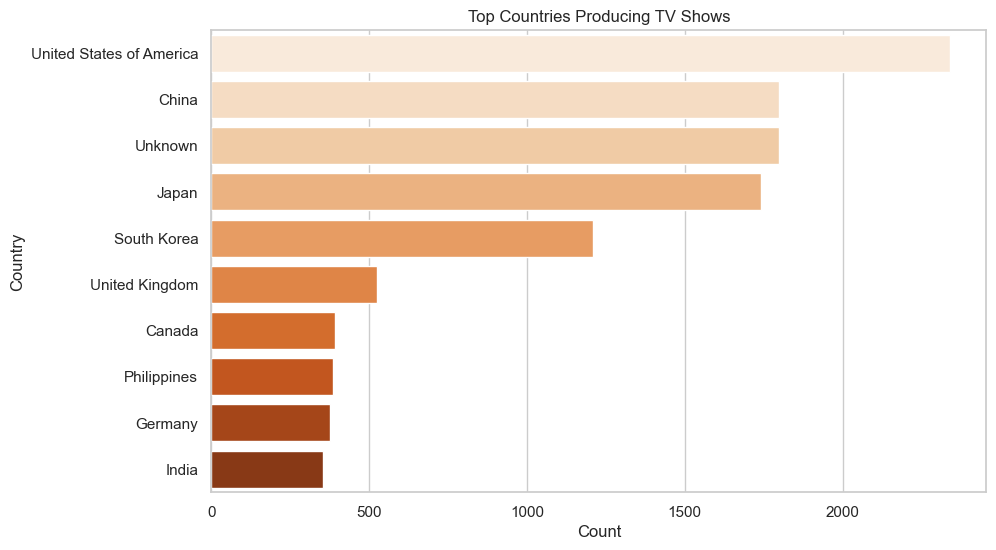

In [32]:

top_countries_movies = movies_df['country'].value_counts().head(10)
sns.barplot(x=top_countries_movies.values, y=top_countries_movies.index, palette='Blues')
plt.title("Top Countries Producing Movies")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

top_countries_series = series_df['country'].value_counts().head(10)
sns.barplot(x=top_countries_series.values, y=top_countries_series.index, palette='Oranges')
plt.title("Top Countries Producing TV Shows")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

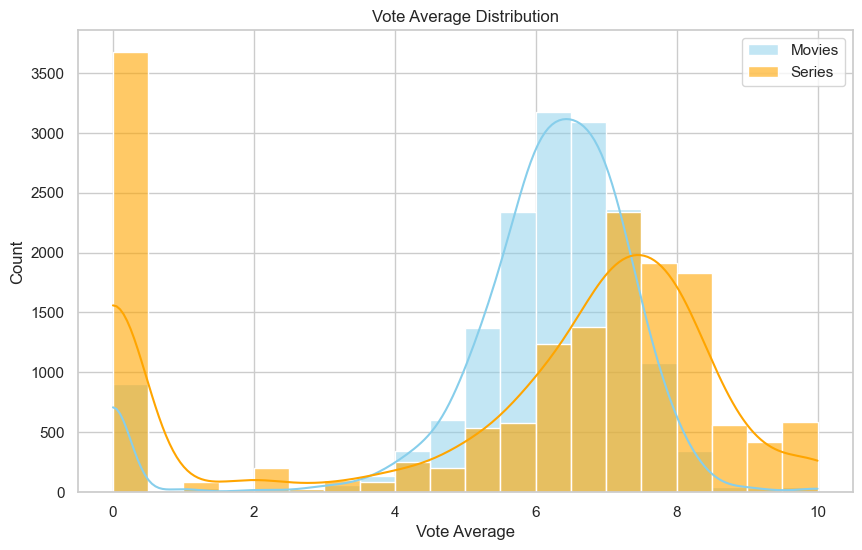

In [33]:

sns.histplot(movies_df['vote_average'], bins=20, kde=True, color='skyblue', label='Movies')
sns.histplot(series_df['vote_average'], bins=20, kde=True, color='orange', label='Series', alpha=0.6)
plt.title("Vote Average Distribution")
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.legend()
plt.show()

In [34]:

movies_df['log_popularity'] = np.log1p(movies_df['popularity'])
series_df['log_popularity'] = np.log1p(series_df['popularity'])

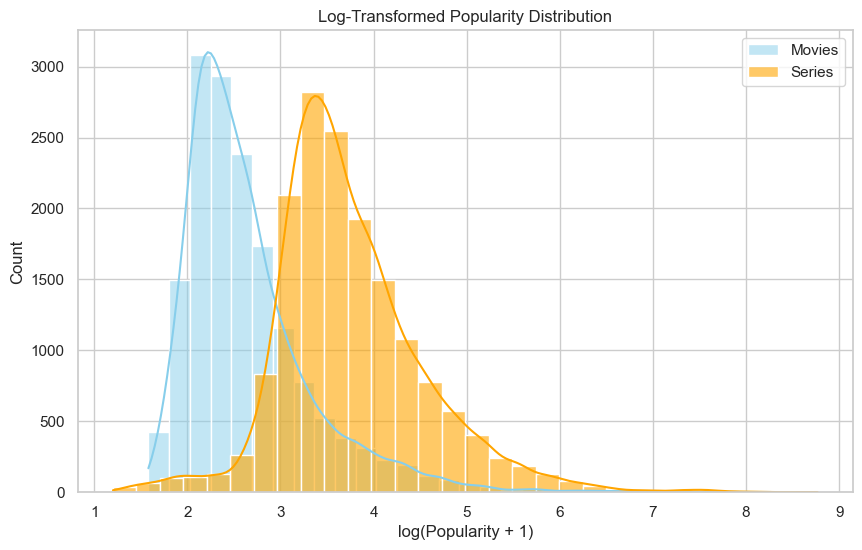

In [35]:
sns.histplot(movies_df['log_popularity'], bins=30, color='skyblue', label='Movies', kde=True)
sns.histplot(series_df['log_popularity'], bins=30, color='orange', label='Series', kde=True, alpha=0.6)
plt.title("Log-Transformed Popularity Distribution")
plt.xlabel("log(Popularity + 1)")
plt.ylabel("Count")
plt.legend()
plt.show()


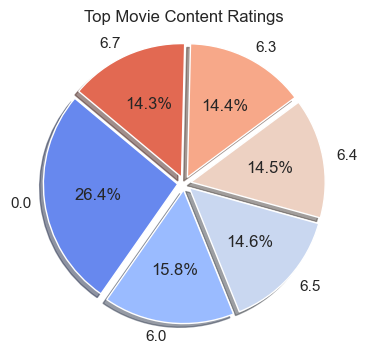

In [36]:

rating_counts = movies_df['rating'].value_counts().head(6)

colors = sns.color_palette("coolwarm", len(rating_counts))
explode = [0.05] * len(rating_counts)

plt.figure(figsize=(4,4))
plt.pie(rating_counts, labels=rating_counts.index, colors=colors, autopct='%1.1f%%',
        shadow=True, explode=explode, startangle=140)
plt.title("Top Movie Content Ratings")
plt.axis('equal')
plt.show()

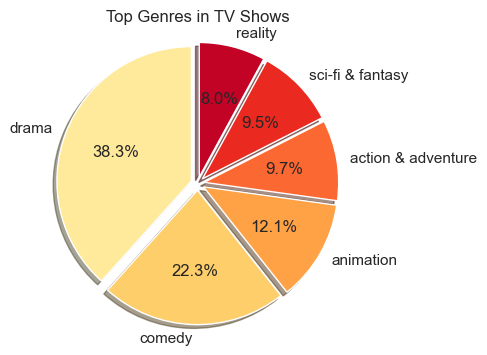

In [37]:

genres_series = series_df['genres'].dropna().str.lower().str.split(', ')
flat_genres = [g for sublist in genres_series for g in sublist]
genre_count = dict(Counter(flat_genres).most_common(6))

colors = sns.color_palette("YlOrRd", len(genre_count))
explode = [0.05] * len(genre_count)

plt.figure(figsize=(4, 4))
plt.pie(genre_count.values(), labels=genre_count.keys(), colors=colors, autopct='%1.1f%%',
        shadow=True, explode=explode, startangle=90)
plt.title("Top Genres in TV Shows")
plt.axis('equal')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3615253442.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['vote_average'], label='Movies', shade=True, color='skyblue')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3615253442.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_df['vote_average'], label='TV Shows', shade=True, color='orange')


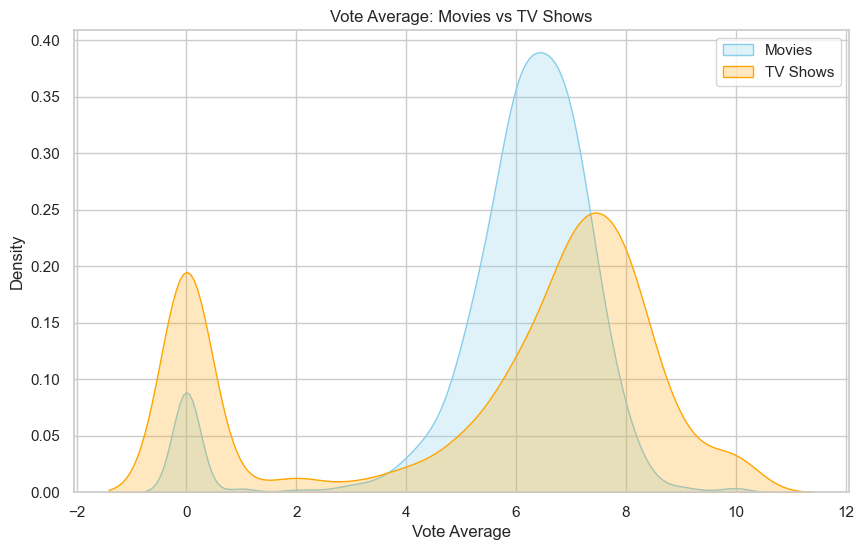

In [38]:

sns.kdeplot(movies_df['vote_average'], label='Movies', shade=True, color='skyblue')
sns.kdeplot(series_df['vote_average'], label='TV Shows', shade=True, color='orange')
plt.title("Vote Average: Movies vs TV Shows")
plt.xlabel("Vote Average")
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2188608970.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['log_popularity'], label='Movies', shade=True, color='skyblue')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2188608970.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series_df['log_popularity'], label='TV Shows', shade=True, color='orange')


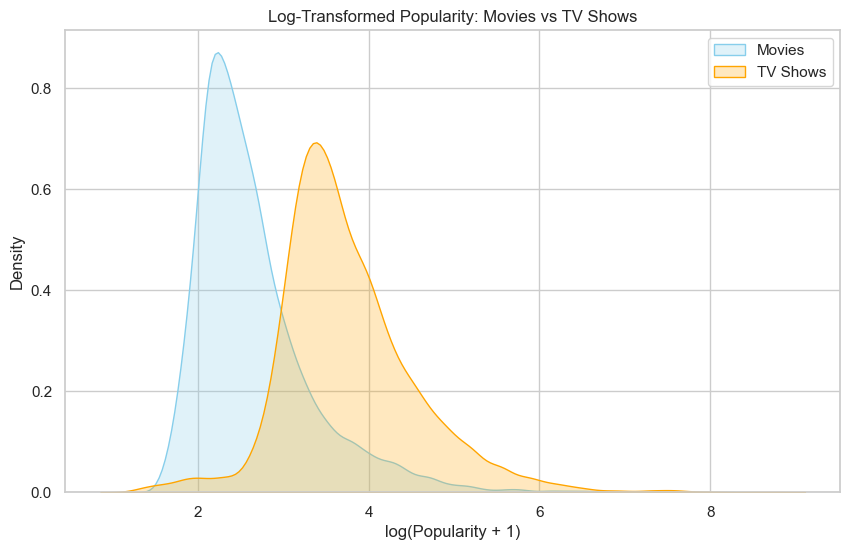

In [39]:

sns.kdeplot(movies_df['log_popularity'], label='Movies', shade=True, color='skyblue')
sns.kdeplot(series_df['log_popularity'], label='TV Shows', shade=True, color='orange')
plt.title("Log-Transformed Popularity: Movies vs TV Shows")
plt.xlabel("log(Popularity + 1)")
plt.legend()
plt.show()

----------- COMPARATIVE ANALYSIS - KEY ASPECTS -------------

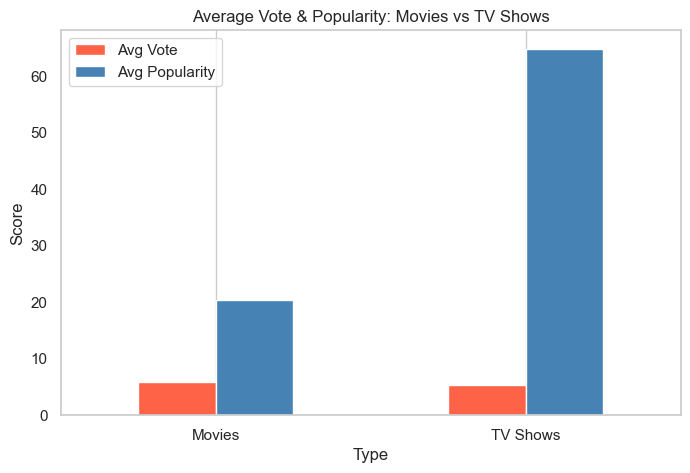

In [40]:

avg_metrics = pd.DataFrame({
    'Type': ['Movies', 'TV Shows'],
    'Avg Vote': [movies_df['vote_average'].mean(), series_df['vote_average'].mean()],
    'Avg Popularity': [movies_df['popularity'].mean(), series_df['popularity'].mean()]
})
avg_metrics.set_index('Type').plot(kind='bar', figsize=(8,5), color=['tomato', 'steelblue'])
plt.title("Average Vote & Popularity: Movies vs TV Shows")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

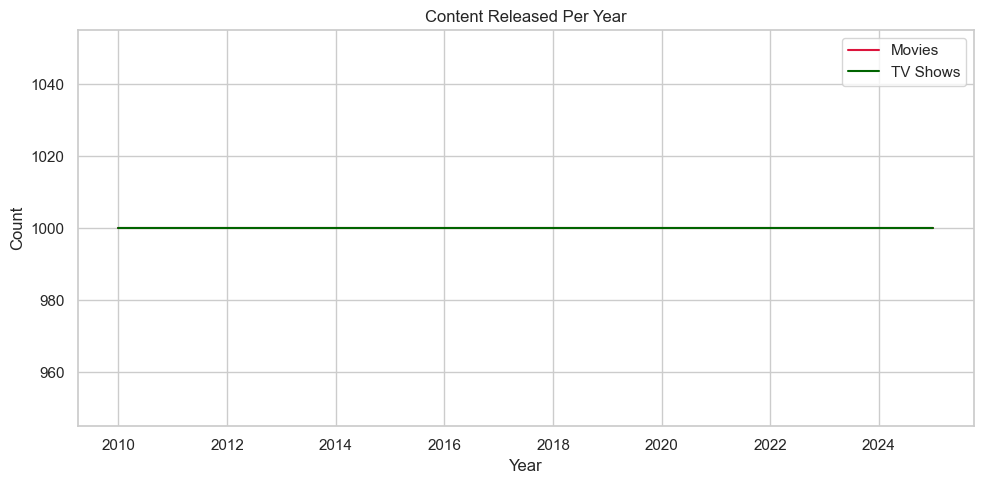

In [41]:

movies_year = movies_df['release_year'].value_counts().sort_index()
series_year = series_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(movies_year.index, movies_year.values, label='Movies', color='crimson')
plt.plot(series_year.index, series_year.values, label='TV Shows', color='darkgreen')
plt.title("Content Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3555301190.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_ratings.values, y=movie_ratings.index, ax=ax[0], palette='Reds_r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3555301190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series_ratings.values, y=series_ratings.index, ax=ax[1], palette='Blues_r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3555301190.py:21: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3555301190.py:21: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) Arial.
  plt.tight_layout(

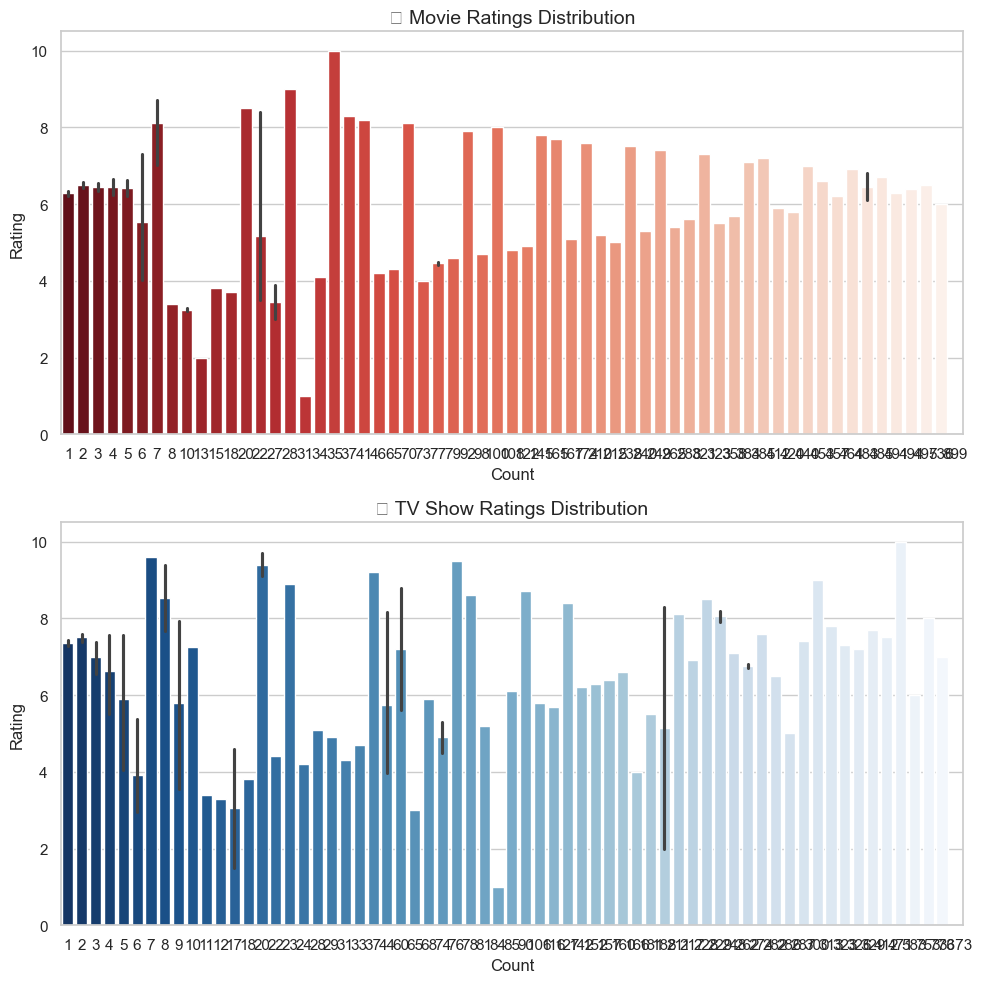

In [42]:


movie_ratings = movies_df['rating'].value_counts().sort_values(ascending=False)
series_ratings = series_df['rating'].value_counts().sort_values(ascending=False)


fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=False)


sns.barplot(x=movie_ratings.values, y=movie_ratings.index, ax=ax[0], palette='Reds_r')
ax[0].set_title("🎬 Movie Ratings Distribution", fontsize=14)
ax[0].set_xlabel("Count", fontsize=12)
ax[0].set_ylabel("Rating", fontsize=12)


sns.barplot(x=series_ratings.values, y=series_ratings.index, ax=ax[1], palette='Blues_r')
ax[1].set_title("📺 TV Show Ratings Distribution", fontsize=14)
ax[1].set_xlabel("Count", fontsize=12)
ax[1].set_ylabel("Rating", fontsize=12)

plt.tight_layout()
plt.show()

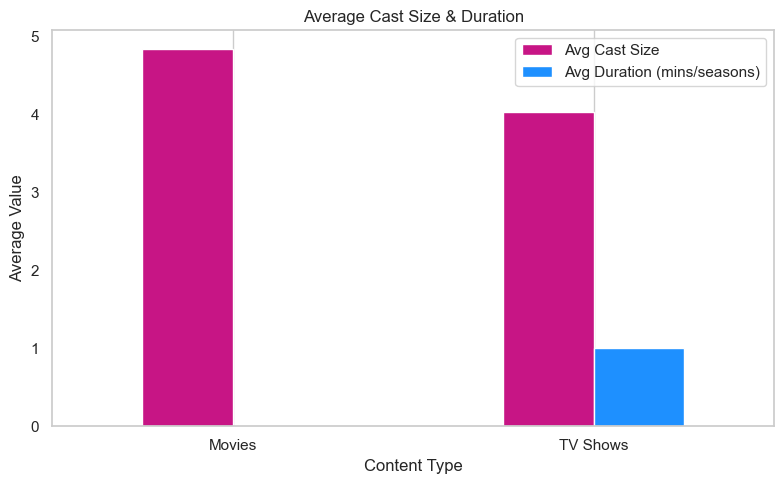

In [43]:



movies_df['cast_size'] = movies_df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
series_df['cast_size'] = series_df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)


import re
def extract_duration(text):
    if pd.isna(text): return None
    match = re.search(r'(\d+)', text)
    return int(match.group(1)) if match else None

movies_df['duration_mins'] = movies_df['duration'].apply(extract_duration)
series_df['seasons'] = series_df['duration'].apply(extract_duration)


avg_cast = [movies_df['cast_size'].mean(), series_df['cast_size'].mean()]
avg_duration = [movies_df['duration_mins'].mean(), series_df['seasons'].mean()]


df_compare = pd.DataFrame({
    'Content Type': ['Movies', 'TV Shows'],
    'Avg Cast Size': avg_cast,
    'Avg Duration (mins/seasons)': avg_duration
})

df_compare.set_index('Content Type').plot(kind='bar', figsize=(8,5), color=['mediumvioletred', 'dodgerblue'])
plt.title("Average Cast Size & Duration")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [44]:

movies_df['date_added'] = pd.to_datetime(movies_df['date_added'], errors='coerce')
series_df['date_added'] = pd.to_datetime(series_df['date_added'], errors='coerce')


movies_df['year_added'] = movies_df['date_added'].dt.year
series_df['year_added'] = series_df['date_added'].dt.year

movies_df['month_added'] = movies_df['date_added'].dt.month
series_df['month_added'] = series_df['date_added'].dt.month


In [45]:

movies_df['cast_size'] = movies_df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
series_df['cast_size'] = series_df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


In [46]:

movies_df['country_count'] = movies_df['country'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
series_df['country_count'] = series_df['country'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)


In [47]:
import re


movies_df['duration_min'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)


series_df['seasons'] = series_df['duration'].str.extract(r'(\d+)').astype(float)


In [48]:

movies_df['desc_length'] = movies_df['description'].apply(lambda x: len(str(x)))
series_df['desc_length'] = series_df['description'].apply(lambda x: len(str(x)))


In [49]:

famous_directors = ['Christopher Nolan', 'Martin Scorsese', 'Steven Spielberg', 'Shah Ruk Khan', 'Robert Downy Junior', 'Leonardo DiCaprio', 'Brad Pitt', 'Morgan Freeman', 'Johnny Depp', 'Robert DeNiro', 'Denzel Washington', 'Tom Hanks', 'Hugh Jackman', 'Al Pacino', 'Bradley Cooper', 'Kate Winslet', 'Natalie Portman', 'Scarlet Johansson', 'Charlize Theron', 'Angelina Jolie',  'Anne Hathaway', 'Nicole Kidman', 'Emma Stone', 'Emily Blunt', 'Julia Roberts', 'Sandra Bullock', 'Rachel McAdams', 'Emma Watson', 'Quentin Tarantino','James Cameron', 'David Fincher', 'Francis Ford', 'Stanley Kubrick', 'Woody Allen', 'Robert Zemeckis', 'David Lynch', 'Roman Polanski', 'Akira Kurosawa']
movies_df['famous_director'] = movies_df['director'].apply(lambda x: 1 if str(x) in famous_directors else 0)
series_df['famous_director'] = series_df['director'].apply(lambda x: 1 if str(x) in famous_directors else 0)

----------RECOMMENDATION SYSTEM-------------

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
content_df['description'] = content_df['description'].fillna('')
content_df['genres'] = content_df['genres'].fillna('')


content_df['text_features'] = content_df['genres'] + " " + content_df['description']


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_df['text_features'])


cosine_sim_combined = cosine_similarity(tfidf_matrix, tfidf_matrix)


content_indices = pd.Series(content_df.index, index=content_df['title'].str.lower()).drop_duplicates()

In [71]:

def recommend_content(title, num=5):
    idx = content_indices.get(title.lower())
    if idx is None:
        return "Content not found in database."
    
    sim_scores = list(enumerate(cosine_sim_combined[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num+1]
    recommended_indices = [i[0] for i in sim_scores]
    
    return content_df.iloc[recommended_indices][['title', 'type', 'genres', 'popularity', 'vote_average']]


recommend_content("sector 36", num=5)

,title,type,genres,popularity,vote_average
6789,Raman Raghav 2.0,Movie,"Thriller, Crime",7.663,7.000
7373,Memoir of a Murderer,Movie,"Crime, Mystery, Thriller",13.028,7.396
1059,Blitz,Movie,"Crime, Action, Thriller",30.120,6.177
6977,Dhuruvangal Pathinaaru,Movie,"Thriller, Action, Crime, Mystery",6.595,7.900
561,The Unjust,Movie,"Crime, Thriller",6.899,6.500


------------RATING PREDICTION--------------

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rating_df = content_df[['popularity', 'vote_count', 'vote_average']].dropna()


X = rating_df.drop('vote_average', axis=1)
y = rating_df['vote_average']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("R² Score:", r2_score(y_test, lr_preds))

Linear Regression:
RMSE: 2.5963501662527166
R² Score: 0.01790577046505093


In [81]:


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R² Score:", r2_score(y_test, rf_preds))

Random Forest Regressor:
RMSE: 1.337446281193135
R² Score: 0.7393970517090565


In [75]:

sample = X_test.iloc[0].values.reshape(1, -1)
predicted_rating = rf_model.predict(sample)
print("Predicted Rating:", predicted_rating[0])
print("Actual Rating:", y_test.iloc[0])

Predicted Rating: 4.195000000000004
Actual Rating: 6.0


C:\Environment\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


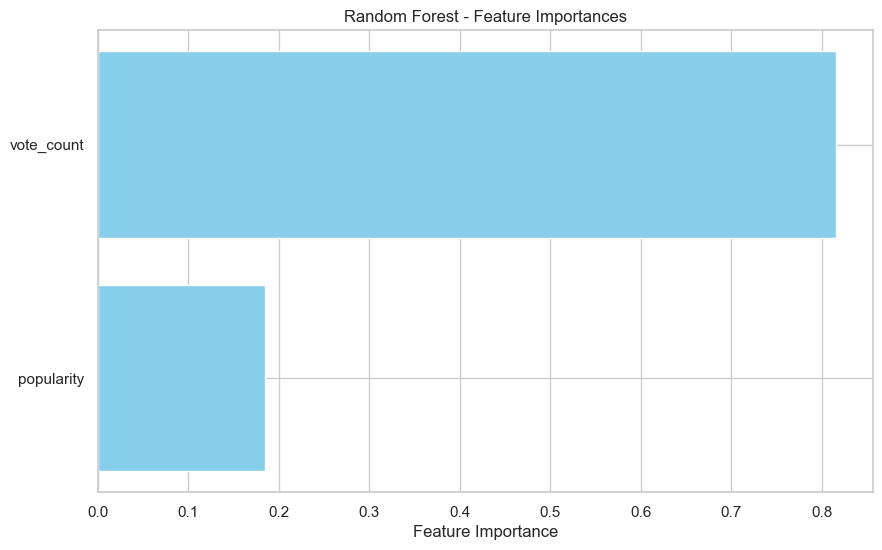

In [82]:
importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.show()

In [3]:
import joblib
import streamlit as st
from sklearn.preprocessing import StandardScaler

In [17]:
'''joblib.dump(rf_model, 'best_rating_predictor.pkl')'''

"joblib.dump(rf_model, 'best_rating_predictor.pkl')"

In [18]:
'''# Load model and any encoders if saved
model = joblib.load('best_rating_predictor.pkl')

st.title("Netflix Content Rating Predictor")

# User inputs
title = st.text_input("Title")
duration = st.slider("Duration (minutes)", 30, 300, 90)
popularity = st.slider("Popularity", 0, 100, 50)
vote_count = st.number_input("Vote Count", 0)
vote_average = st.slider("Vote Average", 0.0, 10.0, 5.0)
budget = st.number_input("Budget", 0)
revenue = st.number_input("Revenue", 0)
cast_size = st.slider("Cast Size", 1, 30, 5)
release_year = st.slider("Release Year", 1950, 2025, 2020)

if st.button("Predict Rating"):
    # Construct DataFrame
    input_df = pd.DataFrame({
        'duration': [duration],
        'popularity': [popularity],
        'vote_count': [vote_count],
        'vote_average': [vote_average],
        'budget': [budget],
        'revenue': [revenue],
        'cast_size': [cast_size],
        'release_year': [release_year]
    })

    # Predict
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted IMDb Rating: {prediction:.2f}")'''

'# Load model and any encoders if saved\nmodel = joblib.load(\'best_rating_predictor.pkl\')\n\nst.title("Netflix Content Rating Predictor")\n\n# User inputs\ntitle = st.text_input("Title")\nduration = st.slider("Duration (minutes)", 30, 300, 90)\npopularity = st.slider("Popularity", 0, 100, 50)\nvote_count = st.number_input("Vote Count", 0)\nvote_average = st.slider("Vote Average", 0.0, 10.0, 5.0)\nbudget = st.number_input("Budget", 0)\nrevenue = st.number_input("Revenue", 0)\ncast_size = st.slider("Cast Size", 1, 30, 5)\nrelease_year = st.slider("Release Year", 1950, 2025, 2020)\n\nif st.button("Predict Rating"):\n    # Construct DataFrame\n    input_df = pd.DataFrame({\n        \'duration\': [duration],\n        \'popularity\': [popularity],\n        \'vote_count\': [vote_count],\n        \'vote_average\': [vote_average],\n        \'budget\': [budget],\n        \'revenue\': [revenue],\n        \'cast_size\': [cast_size],\n        \'release_year\': [release_year]\n    })\n\n    # Pred

In [13]:
content_df['combined_features'] = (
    content_df['title'].fillna('') + ' ' +
    content_df['genres'].fillna('') + ' ' +
    content_df['director'].fillna('')
)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_df['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [15]:
def recommend_by_title(title, content_df, cosine_sim):
    idx = content_df[content_df['title'].str.lower() == title.lower()].index
    if len(idx) == 0:
        return None  # Title not found
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # Top 5
    recommended = content_df.iloc[[i[0] for i in sim_scores]]
    return recommended[['title', 'type', 'genres', 'director', 'vote_average']]

In [16]:
joblib.dump(content_df, "content_df.pkl")
joblib.dump(cosine_sim, "cosine_sim.pkl")

['cosine_sim.pkl']